# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create lists to store retrieved data
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
# set_number_counter = 1

In [4]:
# Config info
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through each city
for index_counter, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        
        # reset index and set counters
        index_counter += 1
#         if index_counter > 50:
#             index_counter = 0
#             set_number_counter+=1
#         else: 
#             index_counter += 1
#         print(f"Processing Record {index_counter} of Set {set_number_counter} | {city}")
        print(f"Processing Record {index_counter} | {city}")
    except:    
        print(f"City not found. Skipping...{city}")

print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | saint-andre-les-vergers
Processing Record 2 | hasaki
Processing Record 3 | saint-philippe
Processing Record 4 | khatanga
Processing Record 5 | mataura
Processing Record 6 | puerto ayora
Processing Record 7 | saravan
Processing Record 8 | punta arenas
Processing Record 9 | priiskovyy
Processing Record 10 | sabang
City not found. Skipping...yunjinghong
Processing Record 12 | leningradskiy
Processing Record 13 | albany
City not found. Skipping...gurgan
Processing Record 15 | coquimbo
City not found. Skipping...artyk
Processing Record 17 | takaka
City not found. Skipping...taolanaro
Processing Record 19 | goderich
Processing Record 20 | bambous virieux
Processing Record 21 | upernavik
Processing Record 22 | richards bay
Processing Record 23 | tuktoyaktuk
Processing Record 24 | hami
Processing Record 25 | gatesville
Processing Record 26 | yumen
Processing Record 27 | lebu
Processing Record 28 | horodnytsya
Processi

Processing Record 245 | bubaque
Processing Record 246 | kurchum
Processing Record 247 | kaitangata
Processing Record 248 | raga
Processing Record 249 | miles city
Processing Record 250 | ostrovnoy
Processing Record 251 | assiniboia
Processing Record 252 | pierre
Processing Record 253 | yuancheng
Processing Record 254 | vallenar
Processing Record 255 | tiznit
City not found. Skipping...tumannyy
Processing Record 257 | ambon
Processing Record 258 | nanortalik
Processing Record 259 | lewisporte
Processing Record 260 | antofagasta
Processing Record 261 | pakhtakoron
Processing Record 262 | raudeberg
Processing Record 263 | tezu
Processing Record 264 | lata
Processing Record 265 | sinnar
Processing Record 266 | mount isa
Processing Record 267 | garowe
Processing Record 268 | zhangye
Processing Record 269 | srednekolymsk
Processing Record 270 | bar harbor
City not found. Skipping...samusu
Processing Record 272 | danane
Processing Record 273 | namibe
Processing Record 274 | georgetown
Process

Processing Record 490 | sitka
Processing Record 491 | santa rosa
Processing Record 492 | ahipara
Processing Record 493 | roma
City not found. Skipping...mrirt
Processing Record 495 | abu kamal
Processing Record 496 | kiunga
Processing Record 497 | san lawrenz
Processing Record 498 | husavik
Processing Record 499 | port-gentil
Processing Record 500 | praia da vitoria
City not found. Skipping...karauzyak
Processing Record 502 | kollam
City not found. Skipping...ambodifototra
Processing Record 504 | vila velha
Processing Record 505 | portland
Processing Record 506 | lowestoft
Processing Record 507 | burnie
Processing Record 508 | flers
Processing Record 509 | taua
Processing Record 510 | brownwood
Processing Record 511 | cartagena
City not found. Skipping...tsihombe
City not found. Skipping...falealupo
City not found. Skipping...kazalinsk
City not found. Skipping...eldikan
Processing Record 516 | charters towers
Processing Record 517 | ozinki
Processing Record 518 | takoradi
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_data_df = pd.DataFrame({
    "City": city_list,
    "Cloudiness (%)": cloudiness_list,
    "Country": country_list,
    "Date": date_list,
    "Humidity (%)": humidity_list,
    "Latitude": lat_list,
    "Longitude": lng_list,
    "Maximum Temperature": max_temp_list,
    "Wind Speed (mph)": wind_speed_list
    })

In [6]:
# ?
city_weather_data_df.to_csv(output_data_file, encoding="utf-8", index=True)
city_weather_data_df

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Maximum Temperature,Wind Speed (mph)
0,Saint-André-les-Vergers,0,FR,1621891032,76,48.2853,4.0521,48.24,16.11
1,Hasaki,22,JP,1621890549,81,35.7333,140.8333,63.00,7.38
2,Saint-Philippe,85,RE,1621890352,78,-21.3585,55.7679,71.19,13.71
3,Khatanga,100,RU,1621891032,99,71.9667,102.5000,31.51,2.35
4,Mataura,6,NZ,1621890531,93,-46.1927,168.8643,32.25,3.04
...,...,...,...,...,...,...,...,...,...
538,Boa Vista,75,BR,1621891158,74,2.8197,-60.6733,82.38,5.75
539,Fortuna,1,US,1621891159,64,40.5982,-124.1573,74.43,4.00
540,Mazatlán,1,MX,1621891159,66,23.2167,-106.4167,89.56,7.00
541,Taltal,100,CL,1621890629,68,-25.4000,-70.4833,66.54,5.17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
excess_humidity = city_weather_data_df["Humidity (%)"]

In [8]:
#  Get the indices of cities that have humidity over 100%.
# for humidity in excess_humidity:
#     print(type(humidity))
#     if humidity > 100:
#         print(humidity)
#     else:
#         print(f"The humidity is not over 100%.")

excess_humidity_list = city_weather_data_df[city_weather_data_df["Humidity (%)"]>100].index
excess_humidity_list

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"N/A")

N/A


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

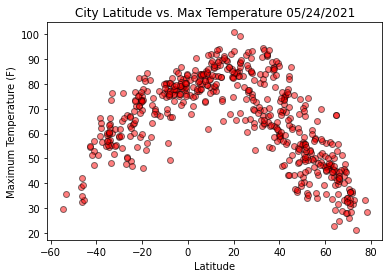

In [10]:
today = time.strftime('%m/%d/%Y')
x = lat_list
y = max_temp_list
plt.scatter(x, y, facecolors="red", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature " + str(today))
# save plot
plt.savefig('../output_data/plot1.png')

## Latitude vs. Humidity Plot

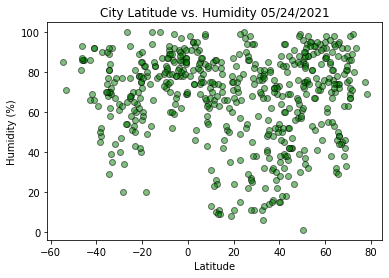

In [11]:
x = lat_list
y = humidity_list
plt.scatter(x, y, facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity " + str(today))
plt.savefig('../output_data/plot2.png')

## Latitude vs. Cloudiness Plot

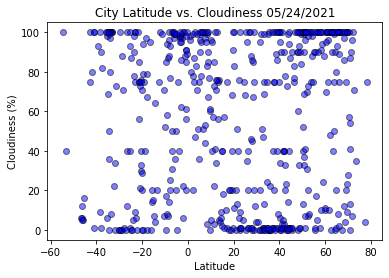

In [12]:
x = lat_list
y = cloudiness_list
plt.scatter(x, y, facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness " + str(today))
plt.savefig('../output_data/plot3.png')

## Latitude vs. Wind Speed Plot

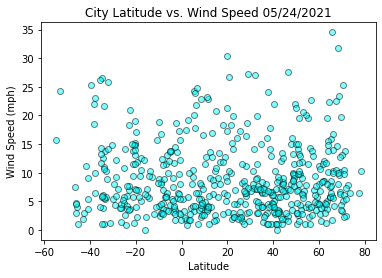

In [13]:
x = lat_list
y = wind_speed_list
plt.scatter(x, y, facecolors="cyan", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed " + str(today))
plt.savefig('../output_data/plot4.png')

## Linear Regression

In [14]:
# Make Northern and Southern Hemisphere dfs
north_hem_df = city_weather_data_df.loc[city_weather_data_df["Latitude"] >= 0]
south_hem_df = city_weather_data_df.loc[city_weather_data_df["Latitude"] < 0]

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

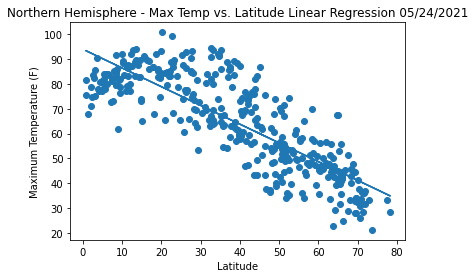

Correlation coefficient: -0.8216027791528477


In [15]:
import scipy.stats as st
# func for regression
y = north_hem_df['Maximum Temperature']
x = north_hem_df['Latitude']

slope, intercept, r, p, std_err = st.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression " + str(today))
plt.show()
print(f"Correlation coefficient: {r}")
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

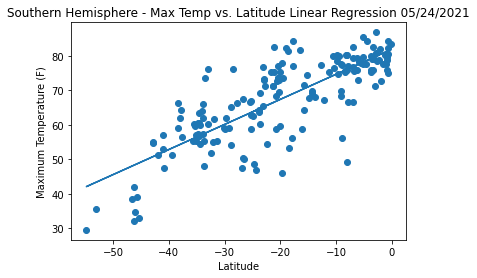

Correlation coefficient: 0.7955404305894769


In [16]:
# func for regression
y = south_hem_df['Maximum Temperature']
x = south_hem_df['Latitude']

slope, intercept, r, p, std_err = st.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression " + str(today))
plt.show()
print(f"Correlation coefficient: {r}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

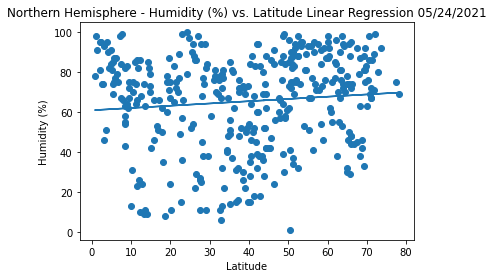

Correlation coefficient: 0.09829029507386289


In [17]:
# func for regression
y = north_hem_df['Humidity (%)']
x = north_hem_df['Latitude']

slope, intercept, r, p, std_err = st.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression " + str(today))
plt.show()
print(f"Correlation coefficient: {r}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

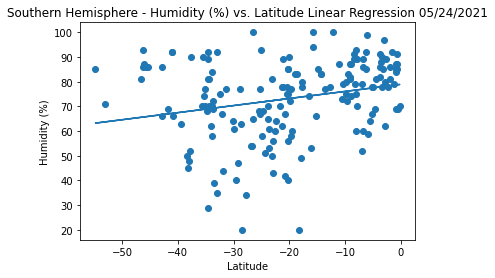

Correlation coefficient: 0.24172850303506976


In [18]:
# func for regression
y = south_hem_df['Humidity (%)']
x = south_hem_df['Latitude']

slope, intercept, r, p, std_err = st.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression " + str(today))
plt.show()
print(f"Correlation coefficient: {r}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

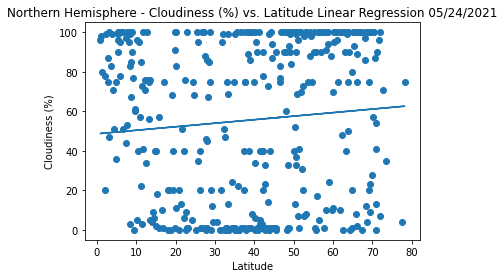

Correlation coefficient: 0.09065756231831527


In [19]:
# func for regression
y = north_hem_df['Cloudiness (%)']
x = north_hem_df['Latitude']

slope, intercept, r, p, std_err = st.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression " + str(today))
plt.show()
print(f"Correlation coefficient: {r}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

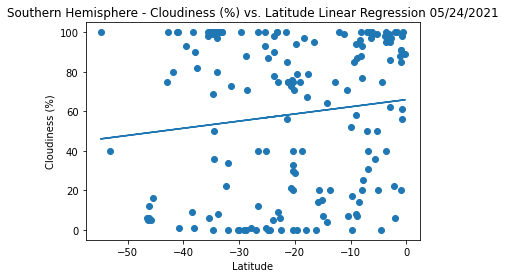

Correlation coefficient: 0.12654072719367526


In [20]:
# func for regression
y = south_hem_df['Cloudiness (%)']
x = south_hem_df['Latitude']

slope, intercept, r, p, std_err = st.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression " + str(today))
plt.show()
print(f"Correlation coefficient: {r}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

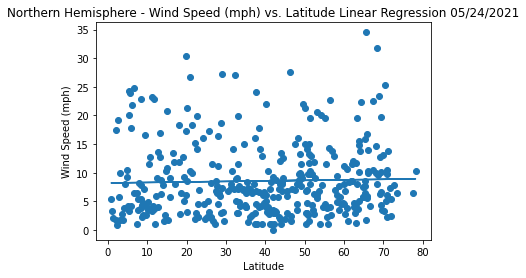

Correlation coefficient: 0.02951932118607466


In [21]:
# func for regression
y = north_hem_df['Wind Speed (mph)']
x = north_hem_df['Latitude']

slope, intercept, r, p, std_err = st.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression " + str(today))
plt.show()
print(f"Correlation coefficient: {r}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

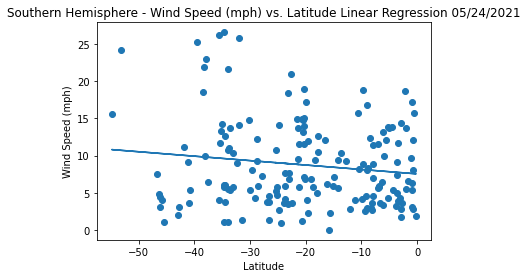

Correlation coefficient: -0.13920858254932392


In [22]:
# func for regression
y = south_hem_df['Wind Speed (mph)']
x = south_hem_df['Latitude']

slope, intercept, r, p, std_err = st.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression " + str(today))
plt.show()
print(f"Correlation coefficient: {r}")

The scatter plot of a city's maximum temperature according to its latitude does demonstrate a clear relationship: as a city's latitude nears 0 degrees (or gets closer to the equator), its maximum temperature is higher. It is also important to note that city temperatures seem to peak at 20 degrees latitude, which is slightly north of the equator. There does not appear to be a relationship between latitude and windspeed, latitude and humidity, nor latitude and cloudiness.

There are strong correlation coefficients when plotting the linear regression of maximum temperatures versus city lattitudes (for both the northern and southern hemispheres), but very weak correlation coefficients when analyzing the linear regression of humidity, cloudiness, or wind speed vs. latitude. 